# Titanic Survival Analysis

In [254]:
## Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

In [255]:
## Importing data set
titanic = pd.read_csv(r'C:\Users\Darshana\Desktop\DSC_WKND20092020\Python\DataSet\titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data

In [256]:
titanic['Cabin'].count()

204

In [257]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [258]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


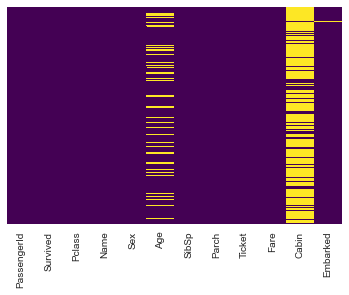

In [259]:
sns.heatmap(titanic.isnull(),yticklabels=False,annot=False,cbar=False,cmap='viridis')

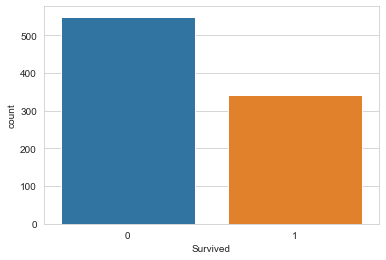

In [260]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

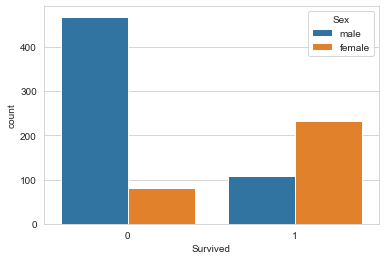

In [261]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic)

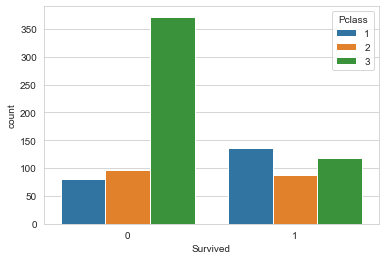

In [262]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [263]:
# sns.set_style('whitegrid')
# sns.countplot(x='Survived',hue='Age',data=titanic)

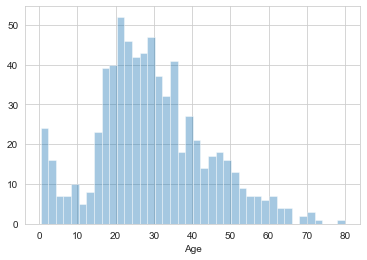

In [264]:
sns.distplot(titanic['Age'].dropna(),kde=False,bins=40)

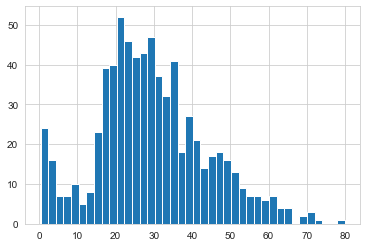

In [265]:
titanic['Age'].hist(bins=40)

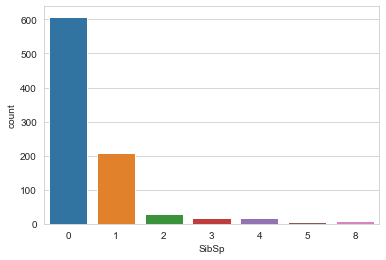

In [266]:
sns.countplot(x='SibSp',data=titanic)

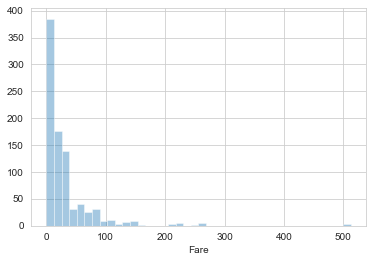

In [267]:
sns.distplot(titanic['Fare'],kde=False,bins=40)

## Data Cleaning

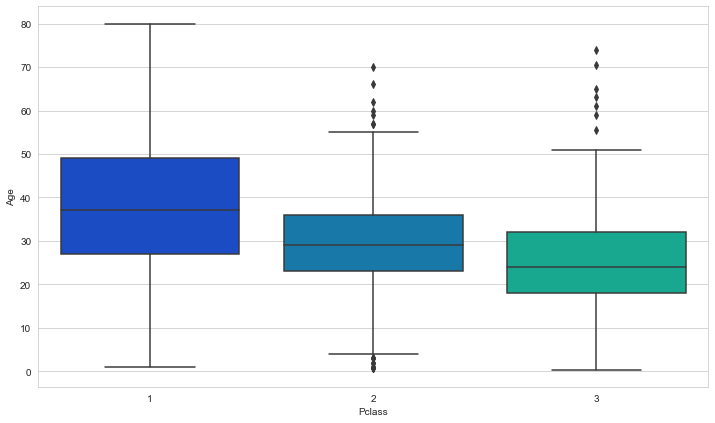

In [268]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [269]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [270]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)
# titanic['Age'].isnull()

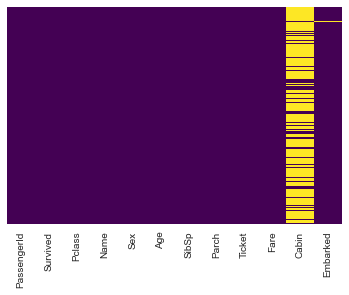

In [271]:
sns.heatmap(titanic.isnull(),yticklabels=False,annot=False,cbar=False,cmap='viridis')

In [272]:
titanic.drop(columns='Cabin',inplace=True,axis=1)

In [273]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [274]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [275]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [276]:
Sex = pd.get_dummies(titanic['Sex'],drop_first=True)
Embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [277]:
titanic.drop(columns=['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [278]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [279]:
titanic=pd.concat([titanic,Sex,Embarked],axis=1)
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [290]:
X = titanic.drop(columns=['Survived','PassengerId'],axis=1)

In [291]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [292]:
Y =titanic['Survived']

In [293]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [295]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=101)

In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)

In [298]:
x_train

array([[-1.59418307,  0.08582773, -0.49131049, ..., -1.35821532,
        -0.30177525,  0.62003584],
       [ 0.81936748,  0.00903846, -0.49131049, ...,  0.73626029,
         3.31372437, -1.61280999],
       [-0.38740779, -1.21958996, -0.49131049, ..., -1.35821532,
        -0.30177525,  0.62003584],
       ...,
       [-1.59418307,  0.93050977, -0.49131049, ..., -1.35821532,
        -0.30177525, -1.61280999],
       [-1.59418307,  1.16087759, -0.49131049, ..., -1.35821532,
        -0.30177525, -1.61280999],
       [ 0.81936748, -0.37490792,  6.48501854, ..., -1.35821532,
        -0.30177525,  0.62003584]])

In [300]:
x_test = standard_scaler.transform(x_test)
x_test

array([[-1.59418307,  1.27606151, -0.49131049, ...,  0.73626029,
        -0.30177525,  0.62003584],
       [-1.59418307, -0.83564358,  0.38073064, ..., -1.35821532,
        -0.30177525, -1.61280999],
       [-1.59418307, -0.7588543 ,  0.38073064, ...,  0.73626029,
        -0.30177525,  0.62003584],
       ...,
       [-0.38740779, -1.98748272,  0.38073064, ...,  0.73626029,
        -0.30177525,  0.62003584],
       [ 0.81936748,  1.62161325, -0.49131049, ...,  0.73626029,
        -0.30177525,  0.62003584],
       [-1.59418307,  2.54308456, -0.49131049, ..., -1.35821532,
        -0.30177525, -1.61280999]])

In [302]:
x_test.shape

(268, 8)

In [304]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10) 
lr.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [305]:
y_pred = lr.predict(x_test)

In [306]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [309]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(134, 20, 37, 77)

In [310]:
from sklearn import metrics
print("Accuracy of test data set:",metrics.accuracy_score(y_test,y_pred))
print("Precision of test data set:",metrics.precision_score(y_test,y_pred))
print("Recall of test data set:",metrics.recall_score(y_test,y_pred))

Accuracy of test data set: 0.7873134328358209
Precision of test data set: 0.7938144329896907
Recall of test data set: 0.6754385964912281


In [314]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
# y_pred_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
# plt.figure(figsize=(10,8))
# plt.plot(fpr,tpr,label="auc="+str(auc))
# plt.legend(loc=4)
# plt.title("Receiver Operating Characteristic Curve (ROC)")
# plt.xlabel("FPR ---->")
# plt.ylabel("TPR ---->")
# plt.show()

0.854522670312144